In [1]:
# Importing essential libraries for data analysis and visualization
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and CSV file handling
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced data visualization
import warnings  # To suppress warnings

In [2]:
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [3]:
# Set default figure size for plots
plt.rcParams['figure.figsize'] = [12, 6]

In [4]:
# Provide the path to your dataset (CSV file)
dataset_path = r'C:/Users/win10/OneDrive/اسناد/git-repo/manufacturing-data-for-polynomial-regression/manufacturing.csv'  # Insert your dataset path here as a string
data = pd.read_csv(dataset_path)

In [5]:
# Display first few rows of the dataset
print("Preview of the dataset:")
print(data.head())

Preview of the dataset:
   Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        209.762701        8.050855             1688.769167   
1        243.037873       15.812068             3842.931469   
2        220.552675        7.843130             1729.823314   
3        208.976637       23.786089             4970.736918   
4        184.730960       15.797812             2918.345014   

   Material Fusion Metric  Material Transformation Metric  Quality Rating  
0            44522.217074                    9.229576e+06       99.999971  
1            63020.764997                    1.435537e+07       99.985703  
2            49125.950249                    1.072839e+07       99.999758  
3            57128.881547                    9.125702e+06       99.999975  
4            38068.201283                    6.303792e+06      100.000000  


In [6]:
# Basic information about the dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [7]:
# Shape of the dataset (rows, columns)
print("\nDataset Shape:", data.shape)


Dataset Shape: (3957, 6)


In [8]:
# Column names in the dataset
print("\nDataset Columns:", data.columns.tolist())


Dataset Columns: ['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric', 'Quality Rating']



Visualizing distributions of features:


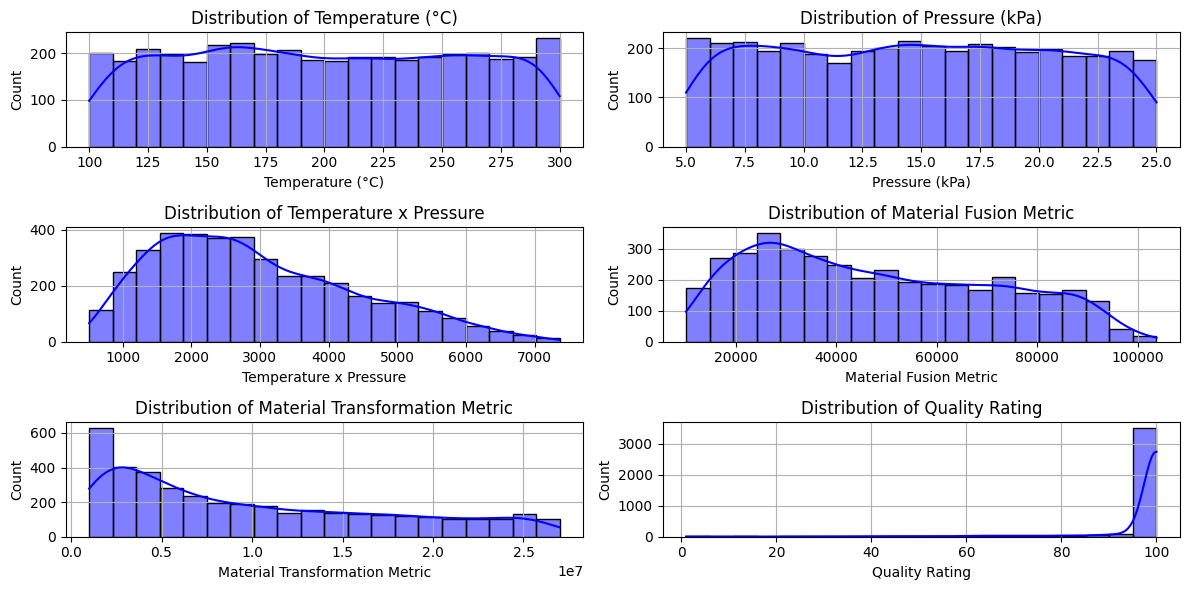

In [9]:
# Exploratory Data Analysis (EDA)

# Visualizing the distribution of each feature
print("\nVisualizing distributions of features:")
rows, cols = 3, 2  # Adjust layout for subplots
feature_idx = 1

for column in data.columns:
    plt.subplot(rows, cols, feature_idx)
    sns.histplot(data[column], kde=True, color='blue', bins=20)  # Changed to histogram with KDE
    plt.title(f"Distribution of {column}")
    plt.grid(True)
    feature_idx += 1
plt.tight_layout()
plt.show()

In [10]:
# Scatter plots to analyze relationships with the target variable
print("\nVisualizing feature relationships with the target variable:")
rows, cols = 3, 2
feature_idx = 1


Visualizing feature relationships with the target variable:


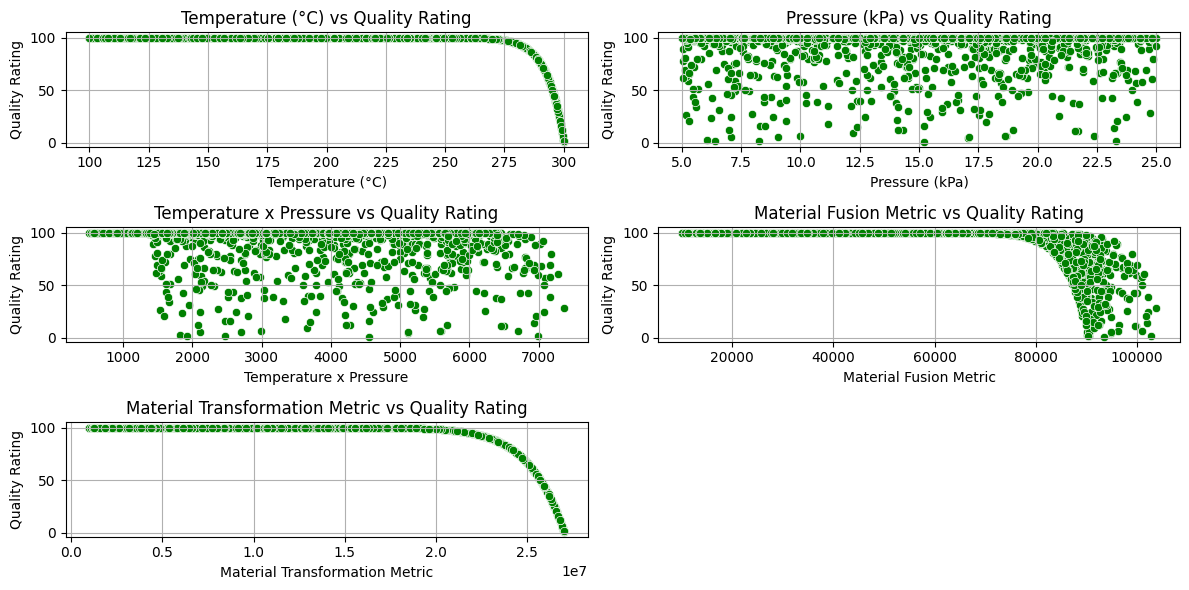

In [11]:
for column in data.columns:
    if column != 'Quality Rating':  # Assuming 'Quality Rating' is the target variable
        plt.subplot(rows, cols, feature_idx)
        sns.scatterplot(x=data[column], y=data['Quality Rating'], color='green')
        plt.title(f"{column} vs Quality Rating")
        plt.grid(True)
        feature_idx += 1
plt.tight_layout()
plt.show()


Boxplot for outlier detection:


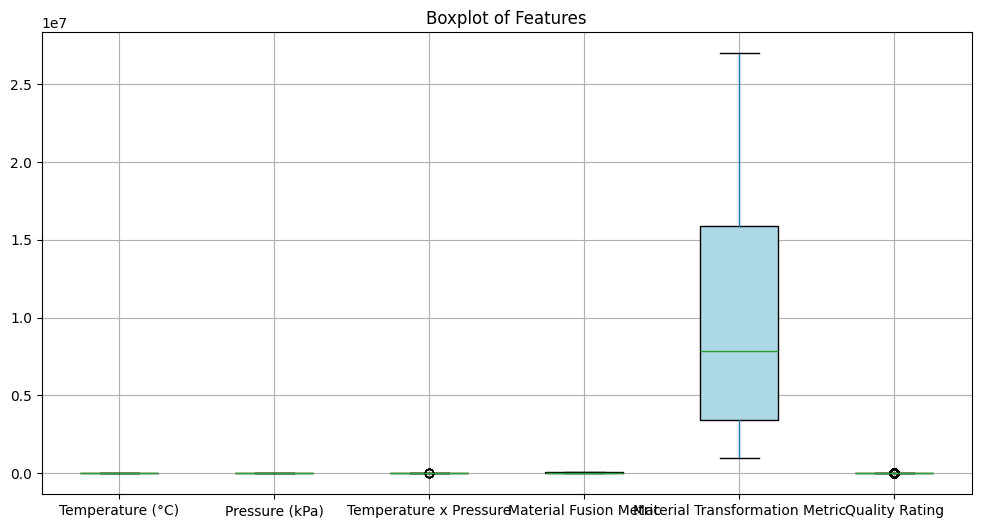

In [12]:
# Boxplot to detect outliers
print("\nBoxplot for outlier detection:")
plt.figure(figsize=(12, 6))
data.boxplot(patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Features")
plt.grid(True)
plt.show()

In [13]:
# Defining target (y) and features (X)
y = data['Quality Rating']  # Target variable
X = data.drop('Quality Rating', axis=1)  # Features

In [14]:
# Data preprocessing: Standardizing the features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [15]:
# Generating polynomial features
poly_transformer = PolynomialFeatures(degree=2)  # Degree of polynomial
X_poly = poly_transformer.fit_transform(X_scaled)

In [16]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [17]:
# Initializing regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [18]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Displaying model coefficients
print("\nLinear Regression Model Coefficients:")
coef_list = ['w' + str(i) for i in range(1, len(linear_model.coef_) + 1)]
coefficients = pd.DataFrame({'Coefficient': coef_list, 'Value': linear_model.coef_})
print(coefficients)


Linear Regression Model Coefficients:
   Coefficient         Value
0           w1      0.000000
1           w2   8347.650151
2           w3  -2365.353669
3           w4   2921.496111
4           w5     73.282301
5           w6 -10748.514605
6           w7   1384.000184
7           w8   -592.170533
8           w9     85.966731
9          w10    -98.508759
10         w11   1994.656125
11         w12    -12.224183
12         w13      9.191332
13         w14    -46.753910
14         w15   -170.428903
15         w16      3.448958
16         w17     43.006906
17         w18     41.168507
18         w19      7.298397
19         w20    -27.266089
20         w21   -477.748236


In [20]:
# Predictions on training and testing data
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)


Comparing predictions with actual values:


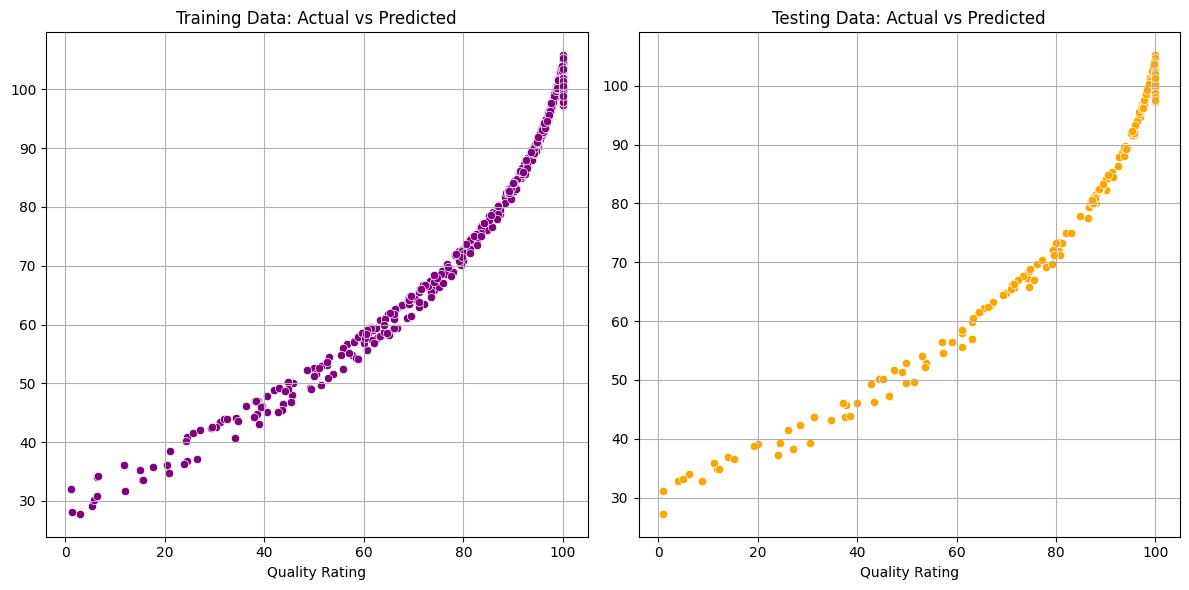

In [21]:
# Scatter plots for predictions
print("\nComparing predictions with actual values:")
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color='purple')
plt.title("Training Data: Actual vs Predicted")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, color='orange')
plt.title("Testing Data: Actual vs Predicted")
plt.grid(True)

plt.tight_layout()
plt.show()

In [22]:
# Evaluating model performance
from sklearn.metrics import r2_score, mean_squared_error

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [23]:
print("\nModel Performance:")
print(f"R2 Score (Training): {train_r2:.3f}")
print(f"R2 Score (Testing): {test_r2:.3f}")
print(f"RMSE (Training): {train_rmse:.3f}")
print(f"RMSE (Testing): {test_rmse:.3f}")


Model Performance:
R2 Score (Training): 0.927
R2 Score (Testing): 0.923
RMSE (Training): 3.374
RMSE (Testing): 3.915
